### Audio Classification Data Preprocessing

In [28]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [29]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


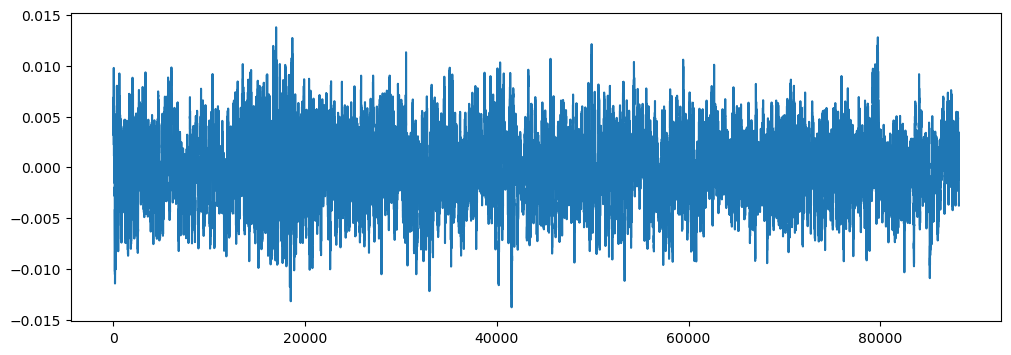

In [30]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [31]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [32]:
wave_audio


array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

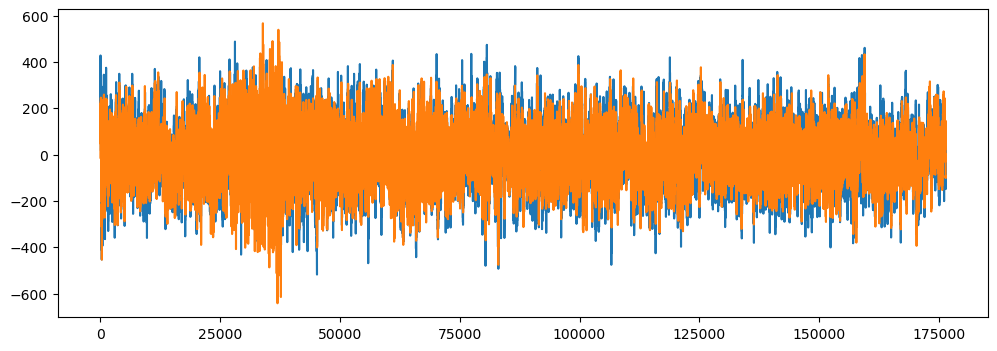

In [33]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [34]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [35]:
mfccs

array([[-4.74862732e+02, -4.50886139e+02, -4.49053375e+02, ...,
        -4.76761566e+02, -4.73348724e+02, -4.90852600e+02],
       [ 1.15302643e+02,  1.11442474e+02,  1.11252251e+02, ...,
         1.11125000e+02,  1.10579697e+02,  1.02991501e+02],
       [-1.83261490e+01, -2.46824493e+01, -3.02597771e+01, ...,
        -8.23576546e+00, -9.06653214e+00, -4.50195312e+00],
       ...,
       [-2.87603617e+00, -3.24797797e+00, -4.89655781e+00, ...,
        -5.20244122e-01,  3.56725454e+00,  7.49375582e+00],
       [-4.29690838e-01, -5.88383555e-01, -8.17239404e-01, ...,
         1.83401793e-01,  7.67324388e-01,  2.71200705e+00],
       [-1.17806172e+00,  6.98101997e-01,  6.35216331e+00, ...,
        -2.62219477e+00, -4.79127216e+00, -3.18262935e+00]], dtype=float32)

In [36]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [37]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [14]:
!pip install resampy
!pip3 install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.0 MB/s eta 0:00:0000:0100:01


In [38]:
conda install -c conda-forge resampy

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.5.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2


WARNING conda.models.version:get_matcher(548): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.9.0.*, but conda is ignoring the .* and treating it as 1.9.0
done
Solving environment: done

## Package Plan ##

  environment location: /Users/deepakmittal/anaconda3

  added / updated specs:
    - resampy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hf0a4a13_0        

In [38]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3551it [00:52, 61.13it/s] /Users/deepakmittal/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [02:11, 69.52it/s] /Users/deepakmittal/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/deepakmittal/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [02:17, 63.31it/s]


In [39]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581207, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.65879, 50.690277, ...",children_playing


In [65]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [66]:
X.shape

(8732, 40)

In [67]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [68]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [69]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [71]:
X_train

array([[-1.24484688e+02,  1.03169846e+02, -1.33165455e+01, ...,
         4.72908735e+00, -2.91925359e+00,  4.36318588e+00],
       [-5.13922548e+00,  7.90478210e+01,  4.16248846e+00, ...,
        -3.44017458e+00, -5.19278240e+00, -1.54999661e+00],
       [-4.03939629e+01, -1.31092958e+01, -7.20987749e+00, ...,
         1.99475431e+00, -8.70601416e-01,  2.89561939e+00],
       ...,
       [-4.26655701e+02,  9.15513382e+01,  4.19170237e+00, ...,
         9.74399805e-01,  5.15444517e-01,  9.15376723e-01],
       [-1.37251984e+02,  1.24268539e+02, -2.15997734e+01, ...,
         1.25008690e+00, -1.89575112e+00, -9.01497006e-01],
       [-4.18389404e+02,  2.06862335e+02,  7.23461580e+00, ...,
        -3.98612213e+00, -4.71784258e+00, -2.78929919e-01]], dtype=float32)

In [72]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
X_train.shape

(6985, 40)

In [74]:
X_test.shape

(1747, 40)

In [75]:
y_train.shape

(6985, 10)

In [76]:
y_test.shape

(1747, 10)

### Model Creation

In [77]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [79]:
### No of classes
num_labels=y.shape[1]

In [80]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [81]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4100      
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 activation_9 (Activation)   (None, 200)               0         
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [82]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [83]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
206/219 [===========================>..] - ETA: 0s - loss: 10.5715 - accuracy: 0.1165
Epoch 1: val_loss improved from inf to 2.29472, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 10.1413 - accuracy: 0.1164 - val_loss: 2.2947 - val_accuracy: 0.1088
Epoch 2/100
144/219 [==================>...........] - ETA: 0s - loss: 2.5623 - accuracy: 0.1280

/Users/deepakmittal/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


192/219 [=========================>....] - ETA: 0s - loss: 2.5239 - accuracy: 0.1257
Epoch 2: val_loss improved from 2.29472 to 2.28173, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.5065 - accuracy: 0.1256 - val_loss: 2.2817 - val_accuracy: 0.1099
Epoch 3/100
192/219 [=========================>....] - ETA: 0s - loss: 2.3254 - accuracy: 0.1134
Epoch 3: val_loss improved from 2.28173 to 2.27387, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.3227 - accuracy: 0.1141 - val_loss: 2.2739 - val_accuracy: 0.1105
Epoch 4/100
192/219 [=========================>....] - ETA: 0s - loss: 2.2794 - accuracy: 0.1271
Epoch 4: val_loss improved from 2.27387 to 2.26119, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.2805 - accuracy: 0.1268 - val_loss: 2.2612 - val_accuracy: 0.1202
Epoch 5

219/219 [==============================] - 0s 1ms/step - loss: 1.4641 - accuracy: 0.4989 - val_loss: 1.2451 - val_accuracy: 0.6016
Epoch 27/100
193/219 [=========================>....] - ETA: 0s - loss: 1.4249 - accuracy: 0.5121
Epoch 27: val_loss improved from 1.24510 to 1.21754, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.4261 - accuracy: 0.5128 - val_loss: 1.2175 - val_accuracy: 0.6108
Epoch 28/100
194/219 [=========================>....] - ETA: 0s - loss: 1.4177 - accuracy: 0.5114
Epoch 28: val_loss improved from 1.21754 to 1.15897, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.4028 - accuracy: 0.5165 - val_loss: 1.1590 - val_accuracy: 0.6211
Epoch 29/100
195/219 [=========================>....] - ETA: 0s - loss: 1.3675 - accuracy: 0.5345
Epoch 29: val_loss did not improve from 1.15897
219/219 [==============================] - 0s 1ms

219/219 [==============================] - 0s 1ms/step - loss: 1.0705 - accuracy: 0.6435 - val_loss: 0.8625 - val_accuracy: 0.7321
Epoch 53/100
194/219 [=========================>....] - ETA: 0s - loss: 1.0492 - accuracy: 0.6495
Epoch 53: val_loss improved from 0.84891 to 0.83661, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 1.0445 - accuracy: 0.6517 - val_loss: 0.8366 - val_accuracy: 0.7344
Epoch 54/100
196/219 [=========================>....] - ETA: 0s - loss: 1.0760 - accuracy: 0.6295
Epoch 54: val_loss did not improve from 0.83661
219/219 [==============================] - 0s 1ms/step - loss: 1.0796 - accuracy: 0.6302 - val_loss: 0.8408 - val_accuracy: 0.7367
Epoch 55/100
197/219 [=========================>....] - ETA: 0s - loss: 1.0419 - accuracy: 0.6478
Epoch 55: val_loss improved from 0.83661 to 0.83312, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms

195/219 [=========================>....] - ETA: 0s - loss: 0.9501 - accuracy: 0.6795
Epoch 79: val_loss improved from 0.76032 to 0.74553, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.9479 - accuracy: 0.6795 - val_loss: 0.7455 - val_accuracy: 0.7642
Epoch 80/100
197/219 [=========================>....] - ETA: 0s - loss: 0.9635 - accuracy: 0.6788
Epoch 80: val_loss did not improve from 0.74553
219/219 [==============================] - 0s 1ms/step - loss: 0.9699 - accuracy: 0.6754 - val_loss: 0.7737 - val_accuracy: 0.7584
Epoch 81/100
197/219 [=========================>....] - ETA: 0s - loss: 0.9502 - accuracy: 0.6835
Epoch 81: val_loss did not improve from 0.74553
219/219 [==============================] - 0s 1ms/step - loss: 0.9518 - accuracy: 0.6832 - val_loss: 0.7546 - val_accuracy: 0.7607
Epoch 82/100
196/219 [=========================>....] - ETA: 0s - loss: 0.9614 - accuracy: 0.6827
Epoch 82: val_loss did n

In [118]:
y_pred = model.predict(X_test) 

55/55 [==============================] - 0s 579us/step


In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
precision = precision_score(y_test_arg, Y_pred,average = 'weighted')
recall = recall_score(y_test_arg, Y_pred,average = 'weighted')
score_test = f1_score(y_test_arg, Y_pred, pos_label=list(set(y_test_arg)),average = 'weighted')
print("Accuracy        : ",test_accuracy[1])
print("Precision Score : ",precision) 
print("Recall Score    : ",recall) 
print("F1 Score        : ",score_test) 

55/55 [==============================] - 0s 551us/step
Accuracy        :  0.7784773707389832
Precision Score :  0.8053100338891601
Recall Score    :  0.7784773898111047
F1 Score        :  0.7835032574425731


/Users/deepakmittal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [144]:
X_test[1]

array([-4.6372937e+02, -2.4342041e+00, -3.0510254e+01,  3.1887177e+01,
       -1.1492151e+01, -2.2429037e+01,  2.6173561e+00, -1.9217157e+01,
       -1.8388453e+01,  4.8640223e+00, -2.6504791e+01, -2.1446793e+01,
       -6.2482238e-01, -1.0320668e+01, -1.3166057e+01, -8.4201450e+00,
       -5.9292469e+00,  7.8685222e+00,  1.5739538e+01,  2.0787935e+01,
        2.1855345e+01,  4.8449859e-01, -1.8518404e+01, -5.2144322e+00,
       -5.9252870e-01,  2.8596678e+00, -6.7274928e+00, -1.6577028e+01,
       -9.9458332e+00,  1.2997779e+01,  4.7754970e-01, -2.3734228e+01,
       -1.5428540e+01,  9.4471149e+00,  1.0129692e+01, -3.1265873e-01,
       -1.5573802e+00,  1.8017395e+01,  1.3511433e+01, -4.8382730e+00],
      dtype=float32)

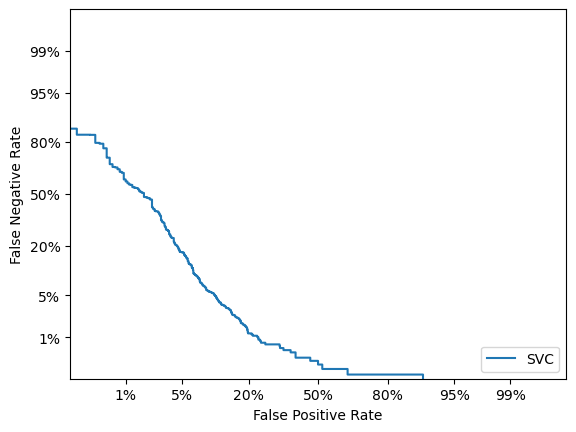

In [160]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import det_curve, DetCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(n_samples=8732, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)
clf = SVC(random_state=0).fit(X_train, y_train)
y_pred = clf.decision_function(X_test)
fpr, fnr, _ = det_curve(y_test, y_pred)
display = DetCurveDisplay(
    fpr=fpr, fnr=fnr, estimator_name="SVC"
)
display.plot()
plt.show()

### Testing Some Test Audio Data


In [103]:
filename="UrbanSound8K/dog_bark.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
=np.argmax(model.predict(mfccs_scaled_features),axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-303.93332     140.60855     -32.37376      -9.772318    -17.440235
  -10.573776     -1.953186      9.280114    -11.462993      3.2083068
   10.827104     10.43939      11.218768     14.24991       2.8506818
    3.0560782     2.7191103    -4.396489     -3.4217048     8.235263
   11.291719     -0.7332225    -1.1282125     4.9773707     0.36357868
   -0.5110568     4.841175     -1.2552752     1.0007181    -0.5510937
   -4.387109     -2.9687922     0.9607441     4.391831     -3.0807378
   -0.45218268   -1.5992694    -4.2512302    -4.1826563    -2.7459965 ]
[[-303.93332     140.60855     -32.37376      -9.772318    -17.440235
   -10.573776     -1.953186      9.280114    -11.462993      3.2083068
    10.827104     10.43939      11.218768     14.24991       2.8506818
     3.0560782     2.7191103    -4.396489     -3.4217048     8.235263
    11.291719     -0.7332225    -1.1282125     4.9773707     0.36357868
    -0.5110568     4.841175     -1.2552752     1.0007181    -0.5510937
    -4.387109 

array(['dog_bark'], dtype='<U16')